In [2]:
from matplotlib import pyplot as plt
import numpy as np
from icecream import ic
%matplotlib inline
#from matplotlib_inline.backend_inline import set_matplotlib_formats
#set_matplotlib_formats('svg')  # shit, matshow is renderd as an image
#import seaborn as sb
from importlib import reload
import SolutionTable
import PRB
from pathlib import Path


Job.Fitter <!=> Surname.Borisov


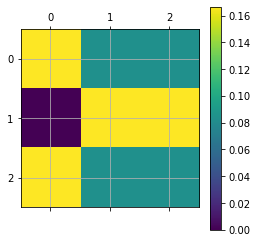

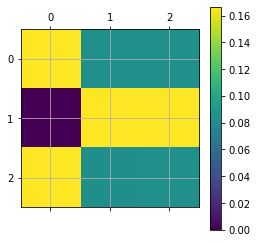

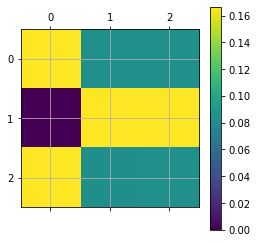

Job.Turner <!=> Surname.Semenov


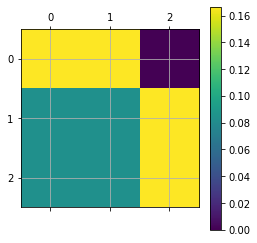

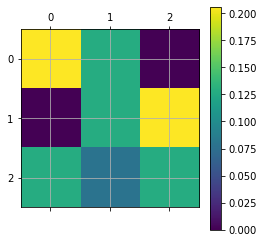

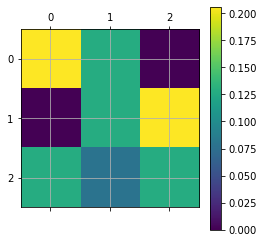

Job.Fitter <!=> Surname.Semenov


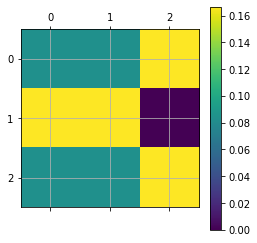

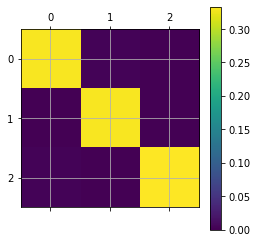

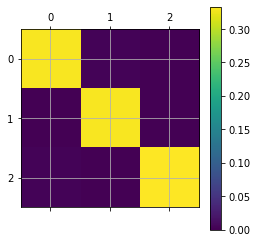

In [7]:
reload(SolutionTable)
reload(PRB)
from SolutionTable import Table
p = PRB.PRB(Path("./prbs/plant.prb"))
#p = PRB.PRB(Path("./prbs/clowns_shoes.prb"))
#p = PRB.PRB(Path("./prbs/mafia_2.prb"))

tableShapeSpec = []
for d in p.description.dims.values():
    tableShapeSpec.append(tuple(d.entities.keys()))

t = Table(*tableShapeSpec)

for el in p.orig.mappingFacts:
    print(el)
    if isinstance(el, PRB.NotMapsFact):
        t.isNot(el.entities[0].id, el.entities[1].id)
    elif isinstance(el, PRB.MapsFact):
        t.equal(el.entities[0].id, el.entities[1].id)
    else:
        raise ValueError(el)
    t.plot()


In [3]:
reload(SolutionTable)
from SolutionTable import buildAlphaVec

buildAlphaVec(np.array([0.1,0.2,0.3, 0.4]))

array([0.1, 0.2, 0.3, 0.4])

In [4]:
reload(SolutionTable)
from SolutionTable import buildAlphaVec, buildBMat, computeNewShit

import scipy.linalg

d = np.array([0.1, 0.5, 0.3, 0.4])
relaxed = computeNewShit(d, [3])
print(d, relaxed)
for i in range(1000):
    d = relaxed
    relaxed = computeNewShit(d, None)
print(d, relaxed, np.sum(relaxed))

[0.1 0.5 0.3 0.4] [0.06666667 0.33333333 0.2        0.26666667]
[0.07692308 0.38461538 0.23076923 0.30769231] [0.07692308 0.38461538 0.23076923 0.30769231] 1.0


In [5]:
d = np.arange(-10, 11, 1)
d = d / len(d)
print(d)

[-0.47619048 -0.42857143 -0.38095238 -0.33333333 -0.28571429 -0.23809524
 -0.19047619 -0.14285714 -0.0952381  -0.04761905  0.          0.04761905
  0.0952381   0.14285714  0.19047619  0.23809524  0.28571429  0.33333333
  0.38095238  0.42857143  0.47619048]


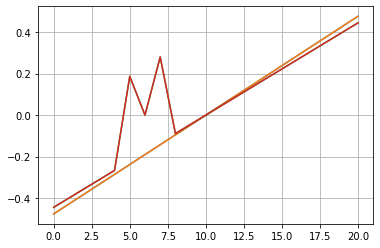

In [6]:
plt.plot(d)
d1 = np.array(d)
d1[5] = 0.2
d1[6] = 0.0
d1[7] = 0.3
plt.plot(d)
plt.plot(computeNewShit(d1))
plt.plot(d1/np.sum(d1))
plt.grid()

In [6]:
isclose?